# Markov Jump Process: M/M/c Queue
Authors: Anca Rusu & Sean Amorotti

## Definition

An M/M/c queue is a model where arrivals are determined by a Poisson process and service times are exponentially distributed across multiple servers ($c$ servers). This model is employed to examine systems such as contact centers, servers in a computer network, or checkout counters in supermarkets, where numerous servers or resources are simultaneously attending to clients.

### Characteristics

1. **Arrivals**:
   - Customers arrive according to a Poisson process with rate $\lambda$ (customers per unit time).
   - The time between arrivals follows an exponential distribution.

2. **Service**:
   - Each of the $c$ servers has an exponential service time distribution with rate $\mu$ (service completions per server per unit time).
   - The service is of the form first-come, first-served.

3. **Queue Dynamics**:
   - The queue can potentially be infinite.
   
   - The state of the system can be described by the number of customers in the system (including those being served).

### Parameters

- $\lambda$: Arrival rate of customers; $\lambda$ $>$ 0.
- $\mu$: Service rate of each server.
- $c$: Number of servers.
- $\rho = \frac{\lambda}{c\mu}$: Traffic intensity.

## State Transition Rates

- **Arrival**: transition from state $n$ to $n+1$. It occurs with rate $\lambda$ for all $n \geq 0$.
- **Service completion:** transition from state $n$ to $n-1$. It occurs with rate $n\mu$ for $1 \leq n \leq c$ and $c\mu$ for $n > c$, since all servers are busy when $n \geq c$.

## Infinitesimal Generator Matrix

$$
Q = \begin{bmatrix}
-c\mu & c\mu & 0 & \dots & 0 \\
\lambda & -(\lambda + c\mu) & c\mu & \dots & 0 \\
0 & \lambda & -(\lambda + c\mu) & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\end{bmatrix}
$$

This matrix describes the rate of leaving each state (negative sums of rows) and transitioning to other states (positive entries).

## Performance Metrics

The performance metrics of interest in an M/M/c system include:

- **Probability of zero customers in the system**:
  $$ P_0 = \left[ \sum_{n=0}^{c-1} \frac{(\lambda/\mu)^n}{n!} + \frac{(\lambda/\mu)^c}{c!} \frac{1}{1-\rho} \right]^{-1} $$
- **Average number of customers in the system ($L$)**.
- **Average time a customer spends in the system ($W$)**.
- **Probability of queueing**.

These metrics aid in the design and expansion of services to satisfy specific performance benchmarks.

## Proof of Stationarity for an M/M/C Queue

Let $X(t)$ be the number of customers in the system at time $t$. $X(t)$ can take values $0, 1, 2, \ldots$.

- If $X(t) = i$ and $i < C$, then customers are arriving at rate $\lambda$ and are served at rate $i\mu$.
- If $X(t) \geq C$, new arrivals still occur at rate $\lambda$ but the service rate is capped at $C\mu$.

The transition probabilities are defined as follows:
- $P(X(t+\delta t) = i+1 \mid X(t) = i) = \lambda \delta t + o(\delta t)$ for $i \geq 0$.
- $P(X(t+\delta t) = i-1 \mid X(t) = i) = \min(i, C) \mu \delta t + o(\delta t)$ for $i > 0$.
- $P(X(t+\delta t) = i \mid X(t) = i) = 1 - (\lambda + \min(i, C) \mu) \delta t + o(\delta t)$.

To find the stationary distribution $\pi = (\pi_0, \pi_1, \pi_2, \ldots)$, we require that the distribution does not change with time, leading to the equilibrium condition:

$$\sum_{j} \pi_j q_{ji} = 0 \quad \text{for all } i$$

where $q_{ji}$ are the rates of going from state $j$ to $i$. Specifically, these equations become:

- For $i = 0$:
  $$\pi_1 \mu - \pi_0 \lambda = 0$$
- For $0 < i < C$:
  $$\pi_{i-1} \lambda + \pi_{i+1} (i+1) \mu = \pi_i(i \mu + \lambda)$$
- For $i \geq C$:
  $$\pi_{i-1} \lambda + \pi_{i+1} C \mu = \pi_i(C \mu + \lambda)$$

#### Solving the Equations

1. **Initial Condition**:
   $$\pi_1 = \frac{\lambda}{\mu} \pi_0$$

2. **Recursive Relation for $i < C$**:
   $$\pi_i = \frac{\lambda^i}{\mu^i i!} \pi_0$$

3. **For $i \geq C$**:
   We switch to using recursive relationship:
   $$\pi_i = \frac{\lambda^i}{\mu^C C^{i-C} C!} \pi_0$$

4. **Normalization**:
   $$\sum_{i=0}^\infty \pi_i = 1$$
   This sum can be split and computed using the formulas for $\pi_i$ up to $C$ and beyond $C$, usually involving the Poisson and geometric series calculations.

#### Conclusion

The existence of the stationary distribution relies on the convergence of the normalization series, which in turn depends on the traffic intensity $\rho = \frac{\lambda}{C \mu}$. If $\rho < 1$, the system is stable, and the series converges, indicating that the system reaches a stationary distribution.

In practical terms, ensuring $\rho < 1$ is critical for the stability and efficiency of the queueing system, particularly in fields like telecommunications and service industry operations where M/M/C models are applicable.

###Code for the Simulation of the Proof

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import heapq

In [2]:
class MMCSimulation:
    def __init__(self, lambda_rate, mu_rate, servers, max_time):
        self.lambda_rate = lambda_rate  # Arrival rate
        self.mu_rate = mu_rate          # Service rate
        self.servers = servers          # Number of servers
        self.max_time = max_time        # Simulation time
        self.time = 0.0                 # Current time
        self.queue = []                 # Queue data structure
        self.events = []                # Event priority queue (heap)
        self.queue_length_over_time = []  # Track queue length over time
        self.waiting_times = []         # Track waiting times

        # Initial event
        self.schedule_next_arrival()

    def schedule_next_arrival(self):
        next_arrival_time = self.time + expon.rvs(scale=1/self.lambda_rate) # Generate next arrival time based on arrival rate
        if next_arrival_time < self.max_time: # If next arrival time is before max time
            heapq.heappush(self.events, (next_arrival_time, 'arrival')) # Add arrival event to heap

    def schedule_next_departure(self):
        next_departure_time = self.time + expon.rvs(scale=1/(self.mu_rate * min(len(self.queue), self.servers))) # Generate next departure time based on number of servers
        heapq.heappush(self.events, (next_departure_time, 'departure')) # Add departure event to heap

    def run(self): # Run the simulation
        while self.events and self.time < self.max_time: # While there are events left
            self.time, event_type = heapq.heappop(self.events) # Get next event

            if event_type == 'arrival': # If event is an arrival
                self.queue.append(self.time) # Add arrival to queue
                self.schedule_next_arrival() # Schedule next arrival
                if len(self.queue) <= self.servers: # If there are servers available
                    self.schedule_next_departure() # Schedule next departure
            elif event_type == 'departure': # If event is a departure
                if self.queue: # If there are people in the queue
                    arrival_time = self.queue.pop(0) # Remove person from queue
                    self.waiting_times.append(self.time - arrival_time) # Calculate waiting time
                    if len(self.queue) >= self.servers: # If there are people in the queue
                        self.schedule_next_departure() # Schedule next departure

            self.queue_length_over_time.append(len(self.queue)) # Track queue length over time

    def rho_results(self):
        rho= self.lambda_rate / (self.mu_rate * self.servers) # Calculate intensity factor
        return rho

    def plot_results(self): # Plot the results
        plt.figure(figsize=(14, 7))

        plt.subplot(1, 2, 1)
        plt.plot(self.queue_length_over_time, label="Queue Length")
        plt.xlabel("Time")
        plt.ylabel("Queue Length")
        plt.title("Queue Length Over Time")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.hist(self.waiting_times, bins=30, alpha=0.75, label="Waiting Times")
        plt.xlabel("Waiting Time")
        plt.ylabel("Frequency")
        plt.title("Distribution of Waiting Times")
        plt.legend()

        plt.tight_layout()
        plt.show()



###Test n°1: Case when $\rho < 1$


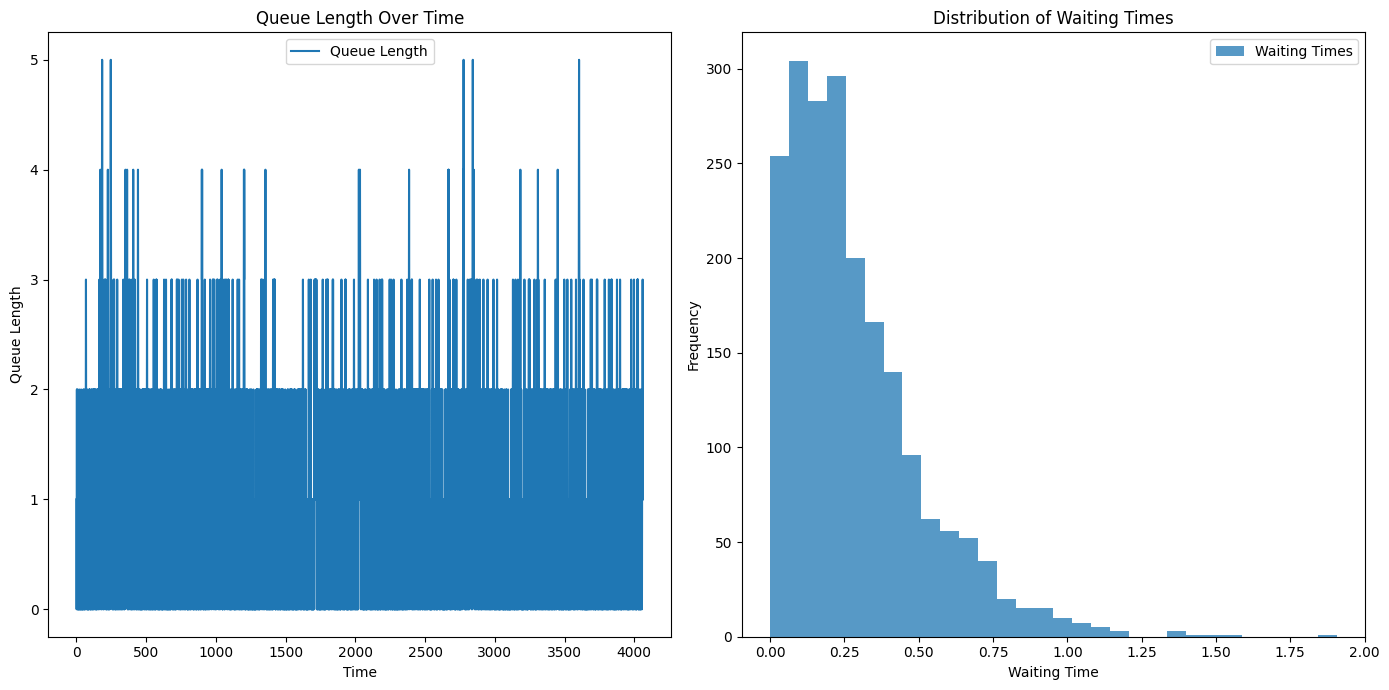

The intensity factor is:  0.3333333333333333


In [3]:
test_1 = MMCSimulation(lambda_rate=2, mu_rate=3, servers=2, max_time=1000)
test_1.run()
test_1.plot_results()
print("The intensity factor is: ", test_1.rho_results())


#### Analysis of Queue Stability for $\rho < 1$


##### Observations
- **Queue Length Over Time**: The plot shows that the queue length fluctuates over time but generally hovers around a consistent average value without any long-term upward or downward trend. This behavior is indicative of the system reaching a steady state, demonstrating that the queue does not grow indefinitely.
- **Distribution of Waiting Times**: The histogram of waiting times indicates that most of the waiting times are concentrated towards the lower end, with a significant frequency of very short waits. There's a long tail, suggesting that while most customers are served relatively quickly, a few experience longer waits.
- **Value of $\rho$**: We can see under the graph that our $\rho$ is 0.3333, satisfying our previous conclusion

##### Conclusion
From the simulation, it appears that the M/M/C queue with the given parameters (λ=2, μ=3, C=2) operates effectively within its capacity, reaching stationarity and managing customer flow without backlog growth over time. The results visually and empirically support the theoretical expectation that the queue reaches a steady state under these conditions.


###Test n°2: Case when $\rho \geq 1$

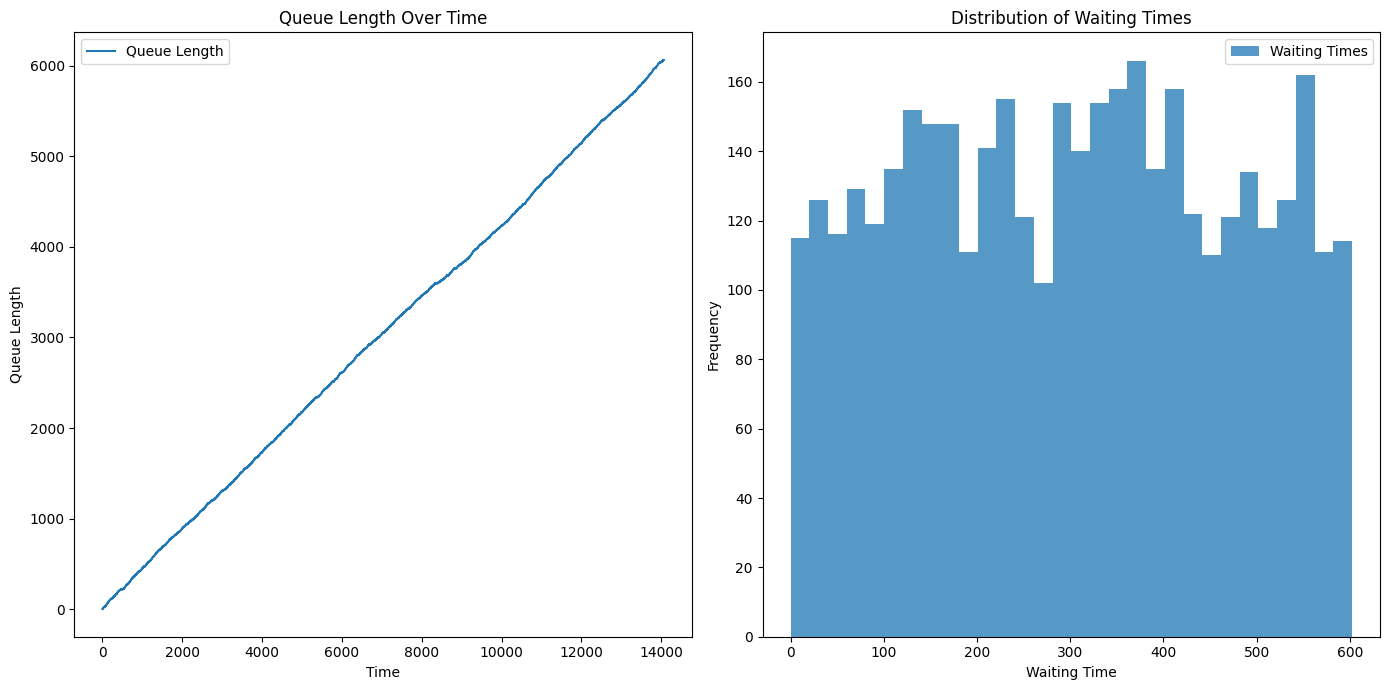

The intensity factor is:  5.0


In [4]:
test_2 = MMCSimulation(lambda_rate=10, mu_rate=1, servers=2, max_time=1000)
test_2.run()
test_2.plot_results()
print("The intensity factor is: ", test_2.rho_results())

#### Analysis of Queue Stability for $\rho \geq 1$

##### Observations
- **Queue Length Over Time**: The plot shows a continuous and substantial increase in queue length over the entire simulation period. This indicates that the queue is growing indefinitely, suggesting that the system is unable to cope with the high rate of arrivals relative to its service capacity. The lack of stabilization highlights the instability of the system under these parameters.
- **Distribution of Waiting Times**: The histogram of waiting times shows a significant skew towards longer waiting periods, with many customers experiencing extended delays. This is indicative of a system that is overwhelmed by the demand, resulting in poor service performance and customer dissatisfaction.
- **Value of $\rho$**: We can see under the graph that our $\rho$ is 5, much larger than 1.

##### Conclusion
The simulation effectively demonstrates that when $\rho \geq 1$ (the arrival rate exceeds the combined service capabilities of the servers), the queue does not reach a steady state but instead grows without bound. This scenario shows there is a need for adequate capacity planning and management in queue systems to ensure stability and efficient operation. Under these conditions, significant improvements are necessary, either by increasing the number of servers, enhancing the service rate, or managing the arrival rate to ensure a functional and efficient system.


### Proof for $\pi_0$ in M/M/c Queue

Let us define $\pi_n$ as the probability of having $n$ customers in the system. For a stable system ($\lambda < c\mu$), the state probabilities can be described by the balance equations derived from the rates of entering and leaving each state.

Now we have:
- **Arrivals**: $\lambda_n = \lambda$ for all states $n$.
- **Services**:
  - For $n < c$: $\mu_n = n\mu$ (each server adds to the service rate).
  - For $n \geq c$: $\mu_n = c\mu$ (service rate caps at $c\mu$ as all servers are busy).

For the system to be in equilibrium, the rate of entering a state must equal the rate of leaving it:
- $\lambda \pi_{n-1} = n\mu \pi_n$ for $n < c$
- $\lambda \pi_{n-1} = c\mu \pi_n$ for $n \geq c$

From these, the recursive relationships for $\pi_n$ in terms of $\pi_0$ are:
- $\pi_n = \frac{(\lambda/\mu)^n}{n!} \pi_0$ for $n < c$
- $\pi_n = \frac{(\lambda/\mu)^n}{c^{n-c} c!} \pi_0$ for $n \geq c$

The total probability must sum to one:
$$ \sum_{n=0}^{\infty} \pi_n = 1 $$

Substituting the expressions for $\pi_n$ and solving for $\pi_0$, we have:
$$ \pi_0 = \left[\sum_{n=0}^{c-1} \frac{(\lambda/\mu)^n}{n!} + \frac{(\lambda/\mu)^c}{c!(1-\rho)}\right]^{-1} $$

Calculated pi_0: 0.50000
Sum of probabilities pi_0 to pi_20: 1.00000


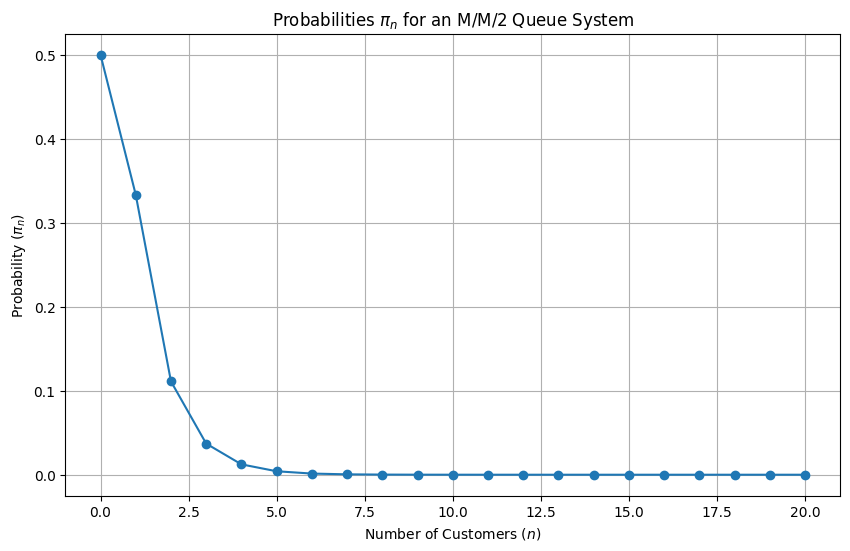

In [5]:
import math
import matplotlib.pyplot as plt

def calculate_pi_0(lmbda, mu, c):
    # Calculate probability of 0 customers in the system
    rho = lmbda / (c * mu)  # Traffic intensity
    sum_pi_n = sum((lmbda / mu) ** n / math.factorial(n) for n in range(c))  # Sum of probabilities
    sum_pi_n += (lmbda / mu) ** c / (math.factorial(c) * (1 - rho))  # Add last term
    return 1 / sum_pi_n

def calculate_pi_n(pi_0, lmbda, mu, c, n):
    # Calculate probability of n customers in the system
    if n < c:  # If n is less than number of servers
        return (lmbda / mu) ** n / math.factorial(n) * pi_0
    else:
        return (lmbda / mu) ** n / (c ** (n - c) * math.factorial(c)) * pi_0

def main():
    lmbda = 2  # arrival rate
    mu = 3     # service rate
    c = 2      # number of servers
    max_n = 20 # calculate probabilities up to pi_max_n

    pi_0 = calculate_pi_0(lmbda, mu, c) # Calculate pi_0
    probabilities = [calculate_pi_n(pi_0, lmbda, mu, c, n) for n in range(max_n + 1)] # Calculate pi_n for n up to max_n

    print(f"Calculated pi_0: {pi_0:.5f}")

    print(f"Sum of probabilities pi_0 to pi_{max_n}: {sum(probabilities):.5f}")

    # Plotting
    customer_numbers = list(range(max_n + 1))
    plt.figure(figsize=(10, 6))
    plt.plot(customer_numbers, probabilities, marker='o')
    plt.title('Probabilities $\pi_n$ for an M/M/2 Queue System')
    plt.xlabel('Number of Customers ($n$)')
    plt.ylabel('Probability ($\pi_n$)')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


#### Observations:
1. **Probability Distribution**:
   - The probabilities decrease rapidly as the number of customers increases. This is a typical behavior in a queueing system where the service rate per server $( \mu )$ is higher than the arrival rate divided by the number of servers ($ \lambda $ c \). It indicates that the system is efficient, with the service capacity generally exceeding the demand.

2. **Sum of Probabilities**:
   - The sum of probabilities from $\pi_0$ to $\pi_{20} $ is 1. This sum confirms that the probabilities are calculated correctly and adhere to the probabilistic requirements of a total sum of 1, validating the normalization.

This shows that the system with these parameters is efficient, as it has minimal queuing and waiting times. It is also able to handle the incoming traffic effectively with the given the current arrival and service rates.